In [9]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 

In [11]:
img = cv2.imread(r"C:\Users\Dell\Downloads\archive (1)\data\SeaLake_1.jpg")
image_dir = "C:/Users/Dell/Downloads/archive (1)/data"

img.shape

(64, 64, 3)

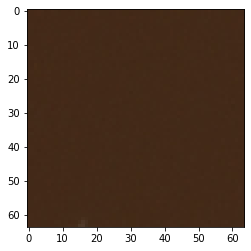

In [7]:
plt.imshow(img)

In [20]:

train_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                 image_size = (64,64),
                                                                 label_mode = "categorical",
                                                                 batch_size= 32,
                                                                 validation_split = 0.20,
                                                                 seed = 42,
                                                                 subset = "training"
                                                                 )

test_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                image_size = (64,64),
                                                                label_mode = "categorical",
                                                                batch_size = 32,
                                                                seed = 42,
                                                                validation_split = 0.20,
                                                                subset = "validation"
                                                                )
train_data.class_names


Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


['cloudy', 'desert', 'green_area', 'water']

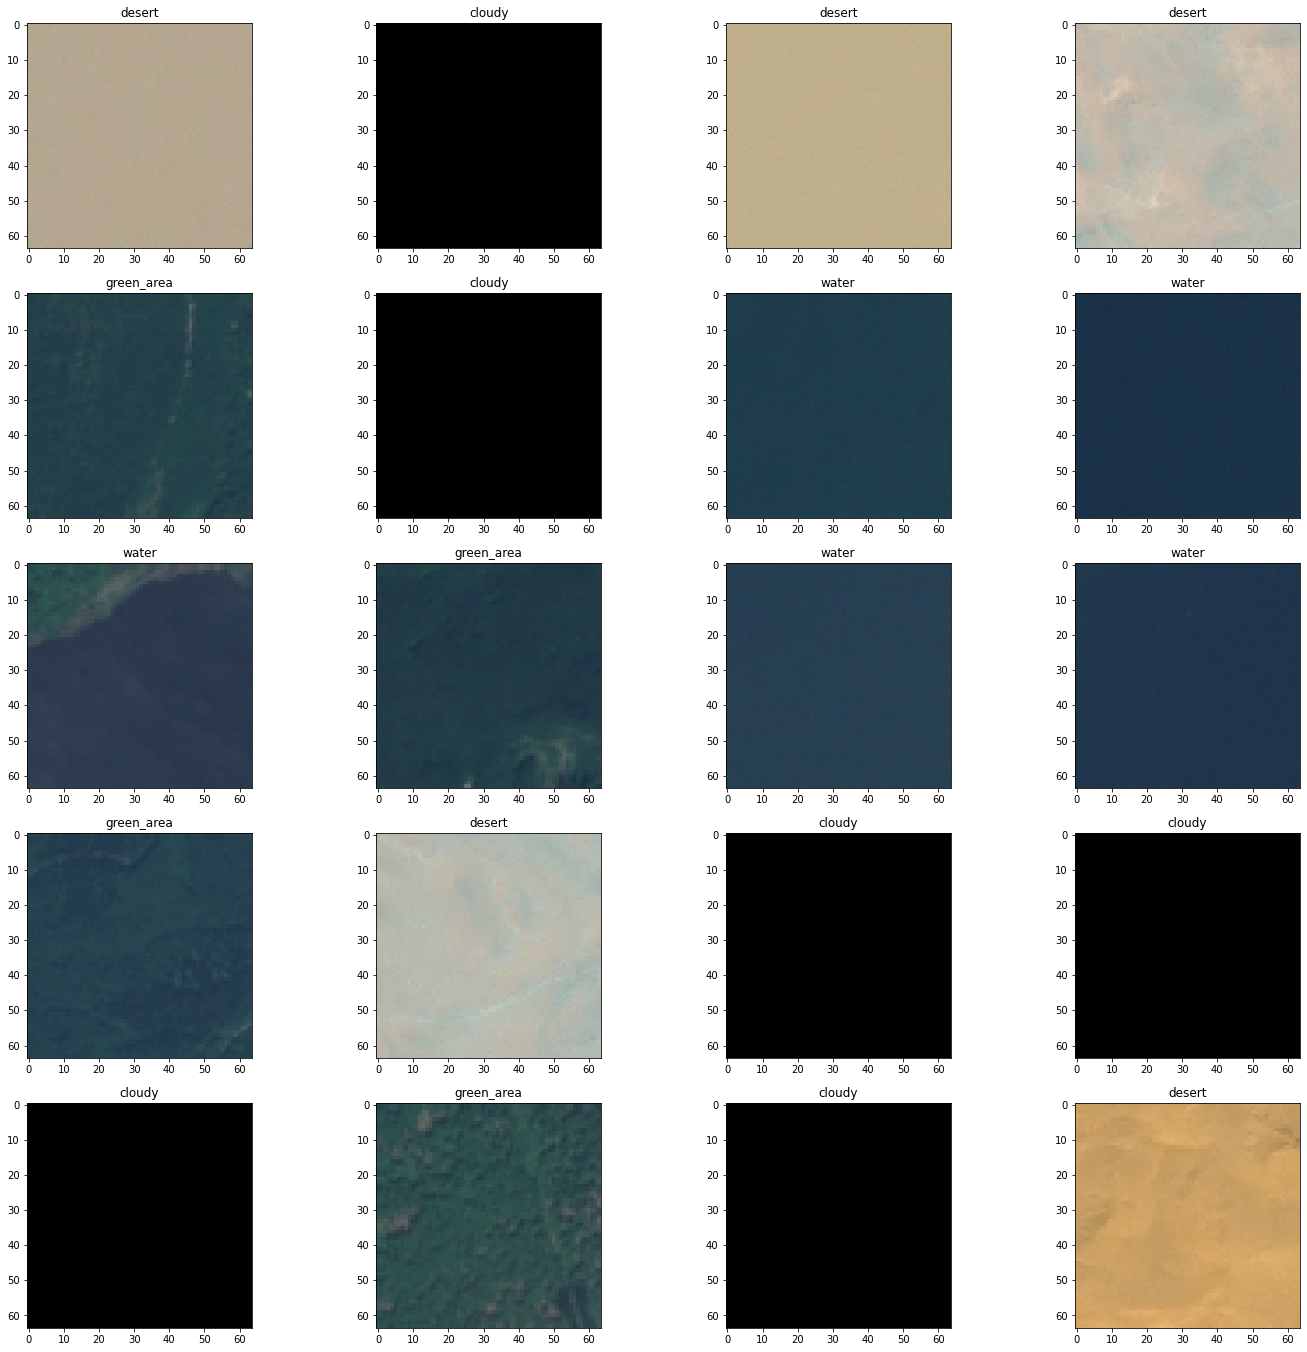

In [27]:
plt.figure(figsize=(24,24))

for image, label in train_data.take(1):
  
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_labels[tf.argmax(label[i])]) 
  